In [1]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = xr.open_dataset('/home/sbeale/prec_march_BC_all_wrf/prism_train.nc')
x

<xarray.Dataset> Size: 20MB
Dimensions:    (longitude: 3216, latitude: 1524)
Coordinates:
  * longitude  (longitude) float64 26kB -140.8 -140.8 -140.8 ... -114.0 -114.0
  * latitude   (latitude) float64 12kB 60.49 60.48 60.48 ... 47.82 47.81 47.8
Data variables:
    prec       (latitude, longitude) float32 20MB ...

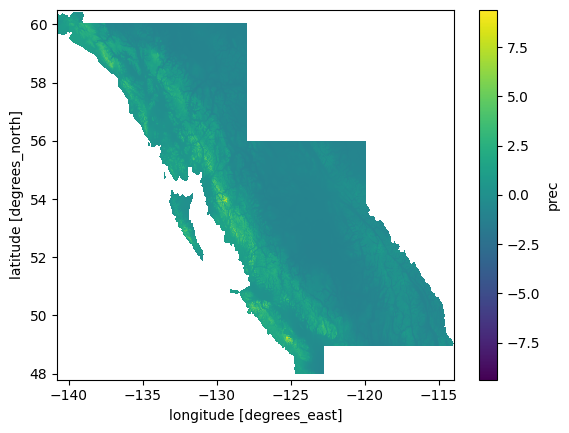

In [3]:
x.prec.plot(cmap='viridis')

In [21]:
stand = pd.read_csv('/home/sbeale/tmax_march_nonan_BC_all//standardization.csv')
x['tmax'] = (x['tmax'] * stand['std'][0]) + (stand['mean'][0])

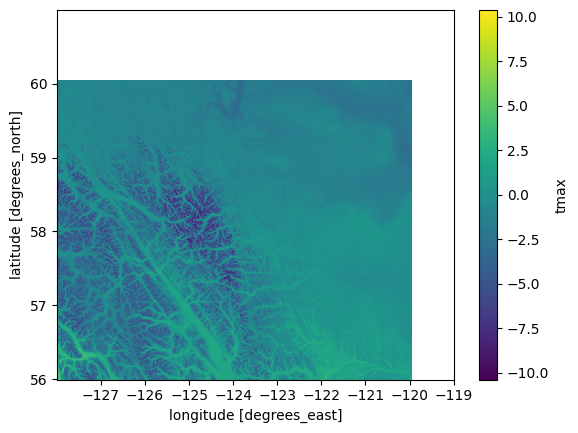

In [22]:
x.tmax.plot(cmap='viridis')

In [23]:
prism = xr.open_dataset('/home/sbeale/climatologies/tmax_03_PRISM.nc')
wrf = xr.open_dataset('/home/sbeale/climatologies/tmax_03_WRF_coarse.nc')
coast = xr.open_dataset('/home/sbeale/climatologies/coast.nc')
dem = xr.open_dataset('/home/sbeale/climatologies/DEM.nc')
lat = xr.open_dataset('/home/sbeale/climatologies/lat.nc')
lon = xr.open_dataset('/home/sbeale/climatologies/lon.nc')

In [24]:
# removing alaska
min_lon = -150
max_lon = -140.81
min_lat = 47
max_lat = 72

# replacing cropped values with NaN
prism['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
wrf['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN

coast['dist'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
dem['dem'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
lat['lat'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
lon['lon'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN

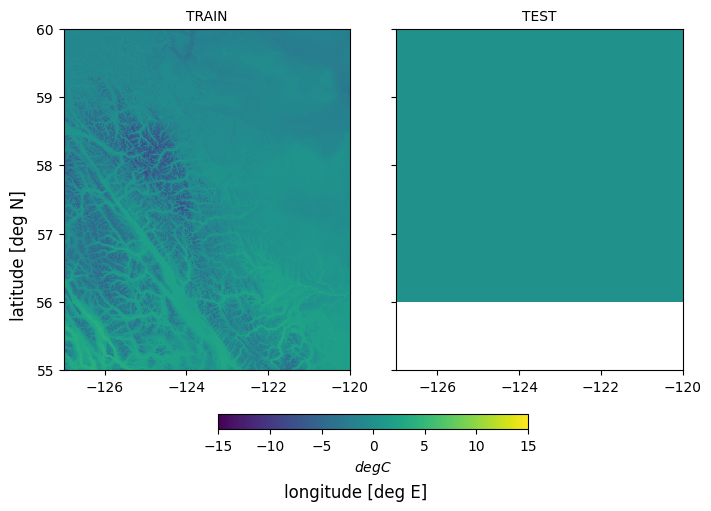

In [28]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.tmax, cmap='viridis', vmin=-15, vmax=15, label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(x.longitude, x.latitude, x.tmax-prism.tmax, cmap='viridis', vmin=-15, vmax=15, label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

ax[0].set_ylim(55,60)
ax[0].set_xlim(-127,-120)

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

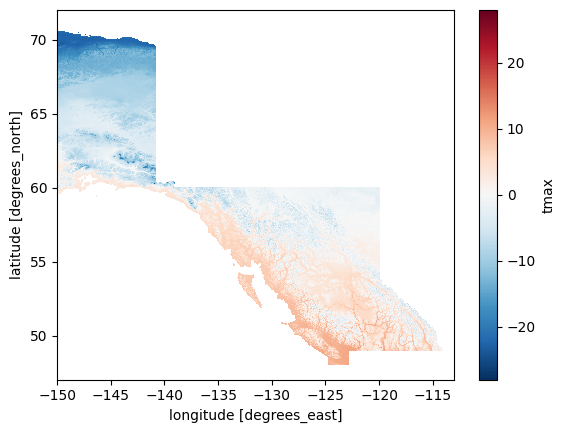

In [3]:
prism.tmax.plot()

In [4]:
x = xr.open_dataset('/home/sbeale/tmax_march_nonan_small/prism_train.nc')
x

<xarray.Dataset> Size: 3MB
Dimensions:    (latitude: 360, longitude: 720)
Coordinates:
  * longitude  (longitude) float64 6kB -134.0 -134.0 -134.0 ... -128.0 -128.0
  * latitude   (latitude) float64 3kB 59.99 59.98 59.98 ... 57.02 57.01 57.0
Data variables:
    tmax       (latitude, longitude) float32 1MB ...
    crs        (latitude, longitude) float64 2MB ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R packages ncdf4 and terra (version 1.7-78)
    date:         2024-06-17 13:21:34

In [2]:
stand = pd.read_csv('~/prec_march_BC_all_wrf/standardization.csv')

In [3]:
stand

,var,month,clim,mean,std
0,prec,3,prism,131.752660,110.590385
1,prec,3,wrf,4.555783,3.215192
2,dist from coast,3,prism,211569.720000,161875.920000
3,dem,3,prism,982.455440,615.520500
4,lat,3,prism,-126.532720,5.744282
5,lon,3,prism,54.162610,3.286740


In [7]:
stand['mean'][1]

-6.2551947

In [8]:
prism_tmax = prism['tmax']
wrf_tmax = wrf['tmax']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

In [9]:
prism['tmax'] = (prism_tmax - stand['mean'][0])/stand['std'][0]
wrf['tmax'] = (wrf_tmax - stand['mean'][1])/stand['std'][1]
coast['dist'] = (coast_dist - stand['mean'][2])/stand['std'][2]
dem['dem'] = (dem_dem - stand['mean'][3])/stand['std'][3]
lat['lat'] = (lat_lat - stand['mean'][4])/stand['std'][4]
lon['lon'] = (lon_lon - stand['mean'][5])/stand['std'][5]

In [10]:
wrf = wrf.sel(latitude=slice(64,49), longitude=slice(-140.81, -113.05))
prism = prism.sel(latitude=slice(64,49), longitude=slice(-140.81, -113.05))
dem = dem.sel(latitude=slice(64,49), longitude=slice(-140.81, -113.05))
lat = lat.sel(latitude=slice(64,49), longitude=slice(-140.81, -113.05))
lon = lon.sel(latitude=slice(64,49), longitude=slice(-140.81, -113.05))
coast = coast.sel(latitude=slice(64,49), longitude=slice(-140.81, -113.05))

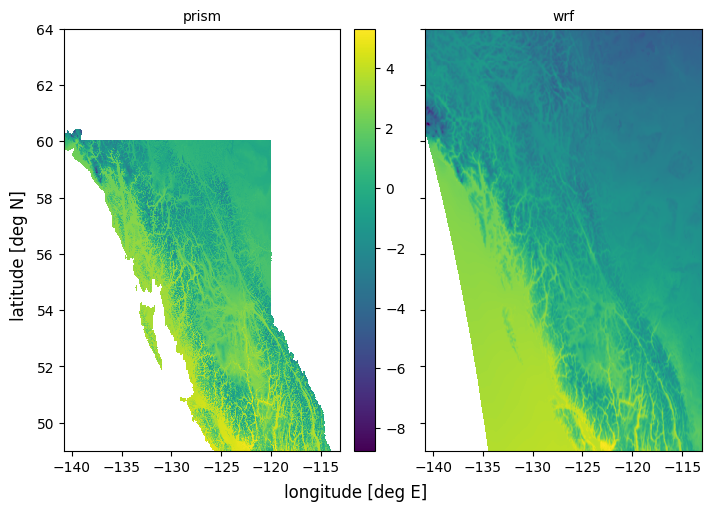

In [11]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.tmax, cmap='viridis', label=r'$m$')
ax[0].set_title(f'prism', fontsize='medium', loc='center')

pc3 = ax[1].pcolormesh(wrf.longitude, wrf.latitude, wrf.tmax, cmap='viridis', label=r'$m$')
ax[1].set_title(f'wrf', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')
fig.colorbar(pc1)

In [12]:
prism.tmax.to_netcdf('/home/sbeale/tmax_march_nonan_small/prism_yuk.nc')
wrf.tmax.to_netcdf('/home/sbeale/tmax_march_nonan_small/wrf_yuk.nc')
dem.dem.to_netcdf('/home/sbeale/tmax_march_nonan_small/dem_yuk.nc')
lat.lat.to_netcdf('/home/sbeale/tmax_march_nonan_small/lat_yuk.nc')
lon.lon.to_netcdf('/home/sbeale/tmax_march_nonan_small/lon_yuk.nc')
coast.dist.to_netcdf('/home/sbeale/tmax_march_nonan_small/coast_yuk.nc')

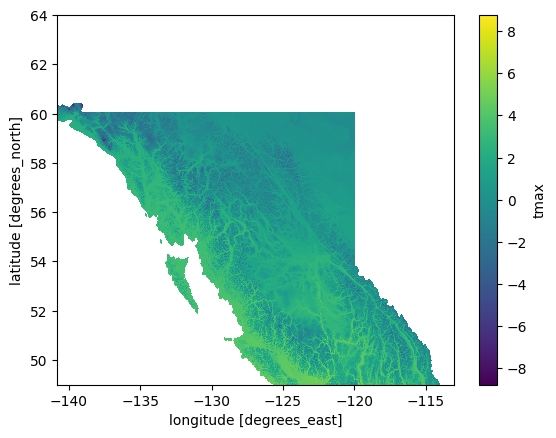

In [13]:
x = xr.open_dataset('/home/sbeale/tmax_march_nonan_small/prism_yuk.nc')
x.tmax.plot(cmap='viridis')

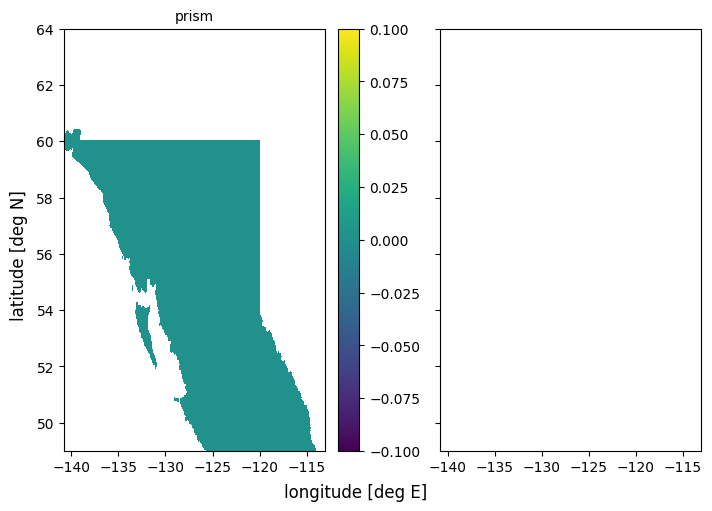

In [14]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.tmax-x.tmax, cmap='viridis', label=r'$m$')
ax[0].set_title(f'prism', fontsize='medium', loc='center')


fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')
fig.colorbar(pc1)

In [66]:
x = torch.load('/home/sbeale/tmax_march_BC_all_wrf/prism_train.pt')

In [67]:
x.shape

torch.Size([24504, 1, 128, 128])

In [23]:
(24504-4)/49

500.0

In [65]:
24504-4

24500

In [63]:
(5334-42)/49

108.0

In [64]:
5334-42

5292